# Stats Analysis

- Exploring Features of the dataset
- Hypothesis Testing 
- Checking for Normal Distribution using Transformations

###  Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/cleaned.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 2 .Hypothesis Testing
#### 2.1 Checking correlation

In [4]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [5]:
df_encoded = pd.get_dummies(df)

# Convert all columns to numeric data types (ignore errors for non-numeric values)
df_numeric = df_encoded.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values
df_numeric.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Print correlation matrix
print(correlation_matrix)

                                                math score  reading score  \
math score                                        1.000000       0.817580   
reading score                                     0.817580       1.000000   
writing score                                     0.802642       0.954598   
total score                                       0.918746       0.970331   
average                                           0.918746       0.970331   
gender_female                                    -0.167982       0.244313   
gender_male                                       0.167982      -0.244313   
race/ethnicity_group A                           -0.091977      -0.096274   
race/ethnicity_group B                           -0.084250      -0.060283   
race/ethnicity_group C                           -0.073387      -0.003074   
race/ethnicity_group D                            0.050071       0.035177   
race/ethnicity_group E                            0.205855       0.106712   

In [6]:
num_data = ['math score','reading score','writing score']

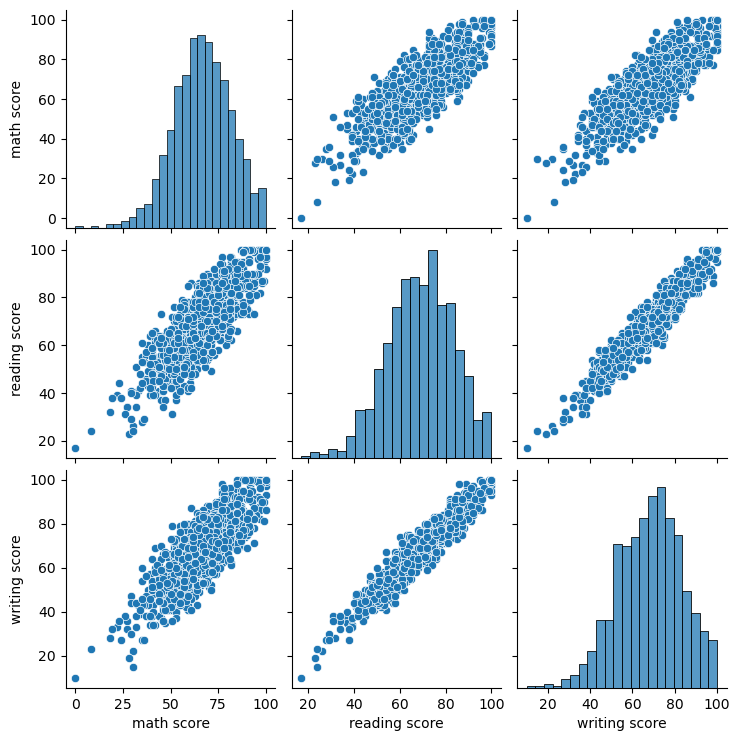

In [7]:
sns.pairplot(df.iloc[:, 4:8])

#### Insights
- All of the pairplots seems to have a linear relationship with the other variable. To clarify that we'll plot the correlation map.

In [8]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

#### 2.2  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [9]:
from scipy.stats import shapiro

shapiro_wick_test = []

for column in num_features:
    
    dataToTest = num_df[column]
    
    stat,p = shapiro(dataToTest)
    
    if p > 0.05:
        
        shapiro_wick_test.append("Normally Distributed")
        
    else:
        shapiro_wick_test.append("Not Normally Distributed")
        
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed


#### 2.3 K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [10]:
from scipy.stats import normaltest

normaltest_test = []

for column in num_features:
    
    dataToTest = num_df[column]
    
    stat,p = normaltest(dataToTest)
    
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
        
    else:
        normaltest_test.append("Not Normally Distributed")
        
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed


#### 2.4 Spearmanr Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

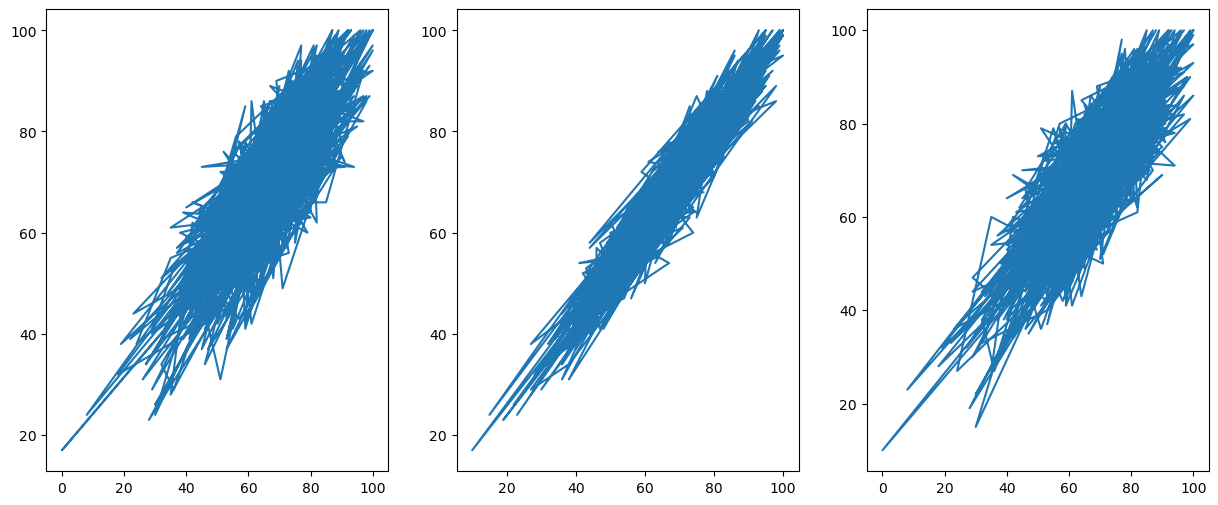

In [11]:
plt.rcParams["figure.figsize"] = (15,6)
plt.subplot(1, 3, 1)
plt.plot(num_df['math score'],num_df['reading score'])
plt.subplot(1, 3, 2)
plt.plot(num_df['writing score'],num_df['reading score'])
plt.subplot(1, 3, 3)
plt.plot(num_df['math score'],num_df['writing score'])
plt.show()

#### Insight 
- We can observe linear relationship amoung two varibales.
- lets prove it hypothetically too using spearman Rank and Pearson Correlation Tests.

In [12]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [13]:
columns_combination = []
test_results = []
test_correlation(spearmanr,'math score','reading score')

In [14]:
test_correlation(spearmanr,'writing score','reading score')

In [15]:
test_correlation(spearmanr,'math score','writing score')

In [16]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


####  2.5 pearsonr Test
- Ho : Independent Samples
- H1 : Dependent Samples

In [17]:
columns_combination = []
test_results = []
test_correlation(pearsonr,'math score','reading score')

In [18]:
test_correlation(pearsonr,'writing score','reading score')

In [19]:
test_correlation(pearsonr,'math score','writing score')

In [20]:
df_pearsonr = pd.DataFrame(columns_combination,test_results)
df_pearsonr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


#### Result
- At 5% level of significance
- From above two tests of Pearsonr and Spearmanr ,
- since all the three p-values are more than 0.05.
- Inference: The scores have a correlation between them.

In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#### 2.6 Chi-squared test 
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average
* Assumptions-
 - All are Independent observation 
 - Size of each box of contingency table > 25

In [22]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in categorical_features:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df['average'], df[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
result = pd.DataFrame(data=[categorical_features, chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Independent Categories
1,race/ethnicity,Independent Categories
2,parental level of education,Independent Categories
3,lunch,Dependent Categories
4,test preparation course,Dependent Categories


**Insights** 
* Here our output is dependent on Lunch & Test preparation course columns

#### 2.7 Levene's Test 
* **Equality of variance test**

- Ho : Female and male have equal variance
- H1 : Female and male do not have equal variance

In [23]:
math_var = scipy.stats.levene(df[df['gender']=='female']['math score'],
                  df[df['gender']=='male']['math score'], center = 'mean')
reading_var = scipy.stats.levene(df[df['gender']=='female']['reading score'],
                  df[df['gender']=='male']['reading score'], center = 'mean')
writing_var = scipy.stats.levene(df[df['gender']=='female']['writing score'],
                  df[df['gender']=='male']['writing score'], center = 'mean')
print("Test Statistic and p-value for math  is", math_var)
print('\n')
print("Test Statistic and p-value for writing is", writing_var)
print('\n')
print("Test Statistic and p-value for reading is", reading_var)

Test Statistic and p-value for math  is LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)


Test Statistic and p-value for writing is LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)


Test Statistic and p-value for reading is LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)


#### Result
- Conclusion : Since, at 5% level of significance, P(calculated) > P(0.05).
- Therefore we will accept the null hypothesis
- Inference : All the scores have equal variance with respect to gender.

#### 2.8 Checking Correlation using Heatmaps

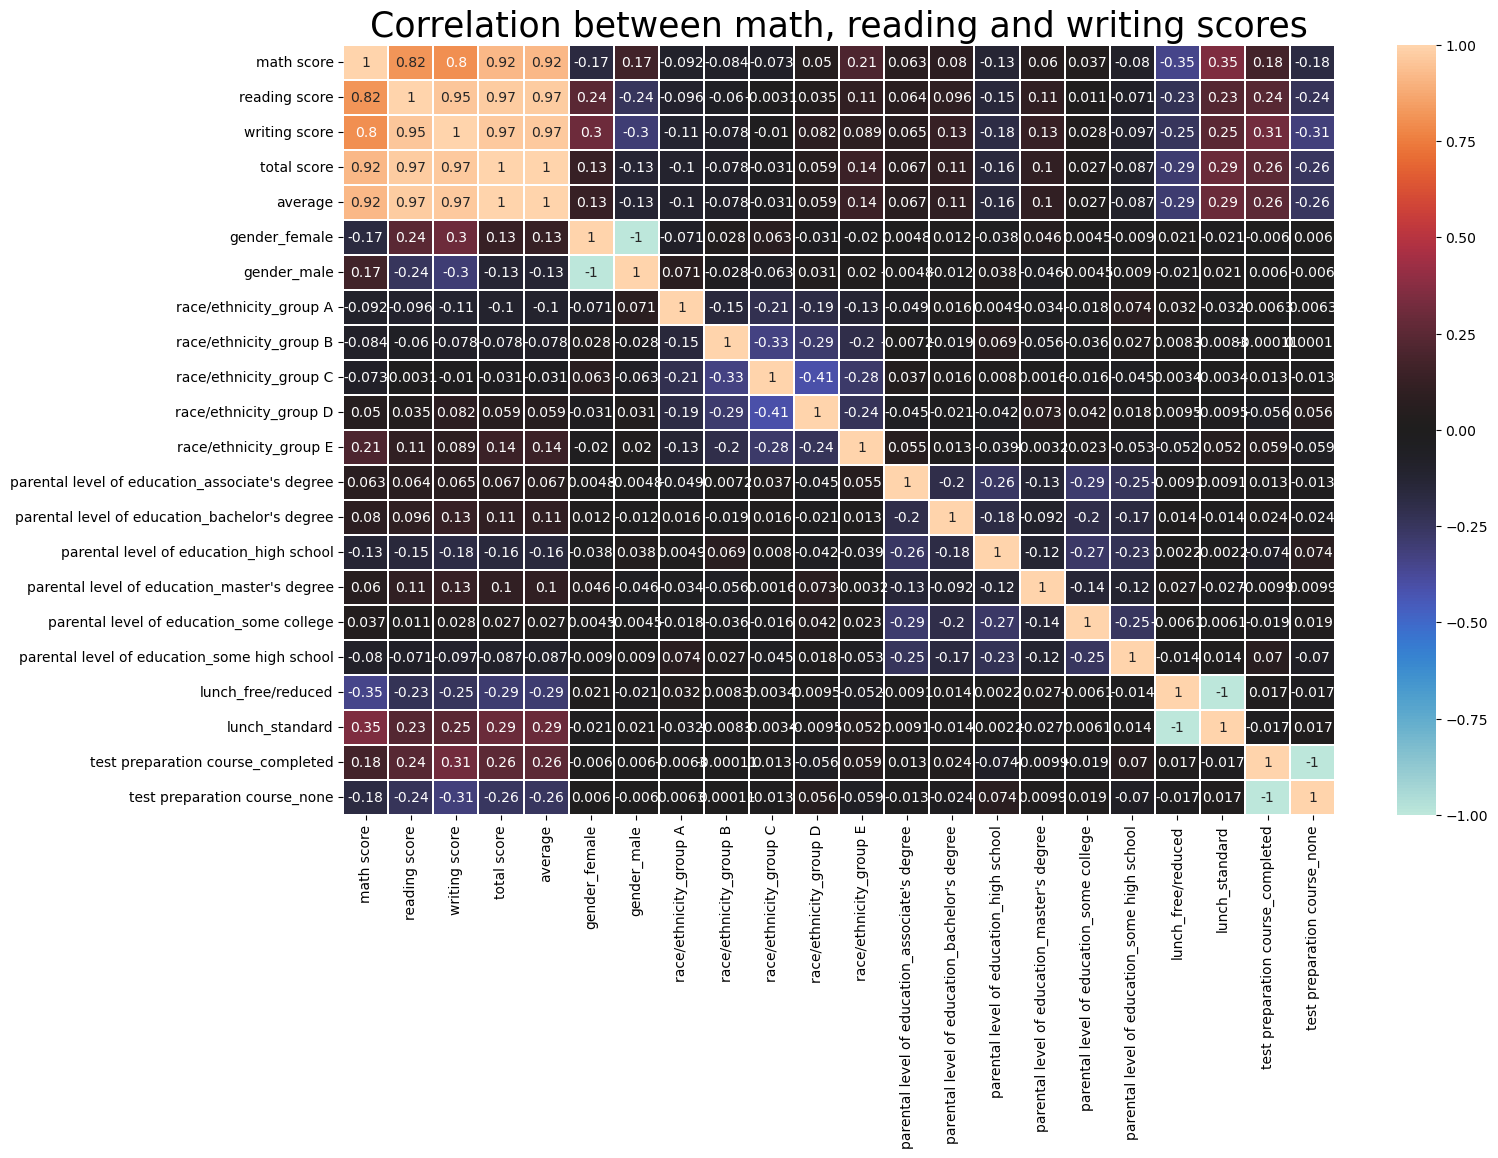

In [24]:
 # Relationship analysis
sns.heatmap(df_numeric.corr(),annot=True,cmap='icefire',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.title('Correlation between math, reading and writing scores',color='black',size=25)
plt.show()

#### Insights 
- Total_score is highly correlated with individual score.
- Reading score is also highly correlated with writing score which means students who reads well can also writes well.
- Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa
- Total_score and average are highy correlated , hence we can delete one amoung them.

###  3 . Checking for Normal Distribution using Transformations
- Q-Q plot (to check if data is normally distributed or not)

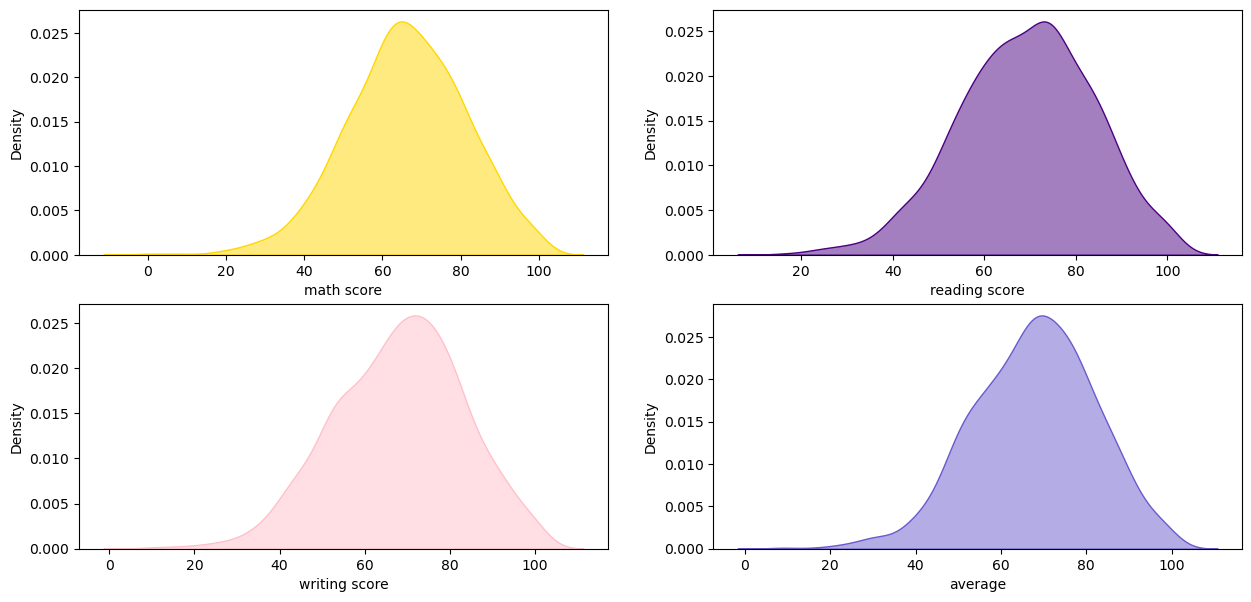

In [25]:
# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

sns.kdeplot(df['math score'],shade=True,label='Maths',color='gold',ax=axs[0, 0],alpha=0.5)
sns.kdeplot(df['reading score'],shade=True,label='Reading',color='indigo',ax=axs[0, 1],alpha=0.5)
sns.kdeplot(df['writing score'],shade=True,label='Writing',color='pink',ax=axs[1, 0],alpha=0.5)
sns.kdeplot(df['average'],shade=True,label='Total',color='slateblue',ax=axs[1, 1],alpha=0.5)
plt.show()

#### 3.1 Log Transform

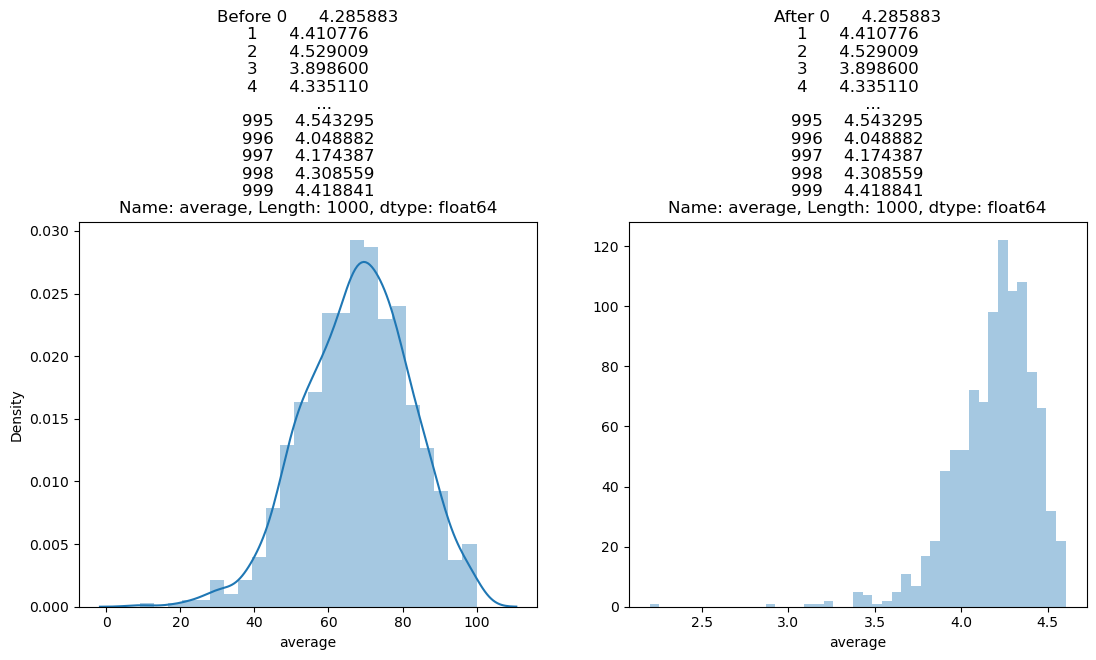

Skewness value -1.5373448376786043


In [41]:
plots(df,'average',np.log(df['average']))
print("Skewness value", np.log(df['average']).skew())

#### Insights
- A negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.

#### 3.2. Square Root Transform

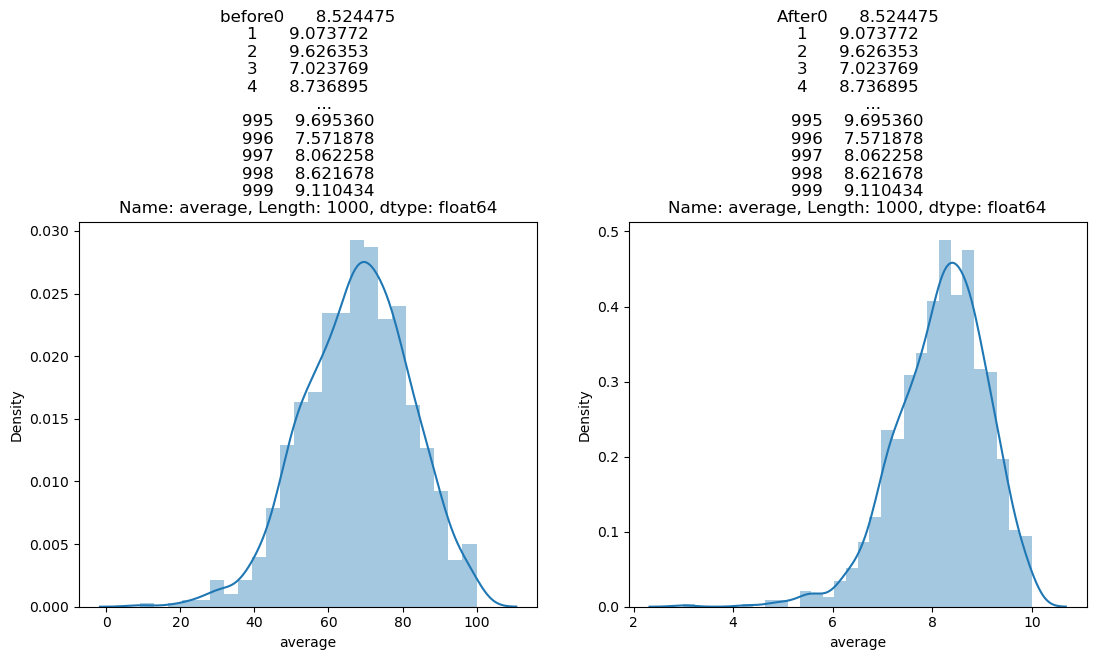

Skewness value -0.7534310044571916


In [28]:
plots(df,'average',np.sqrt(df['average']))
print("Skewness value", np.sqrt(df['average']).skew())

#### 3.3 Box-Cox Transform
- Assumption -
 * your data must be positive

# here i am ploting the distribution and qq plot

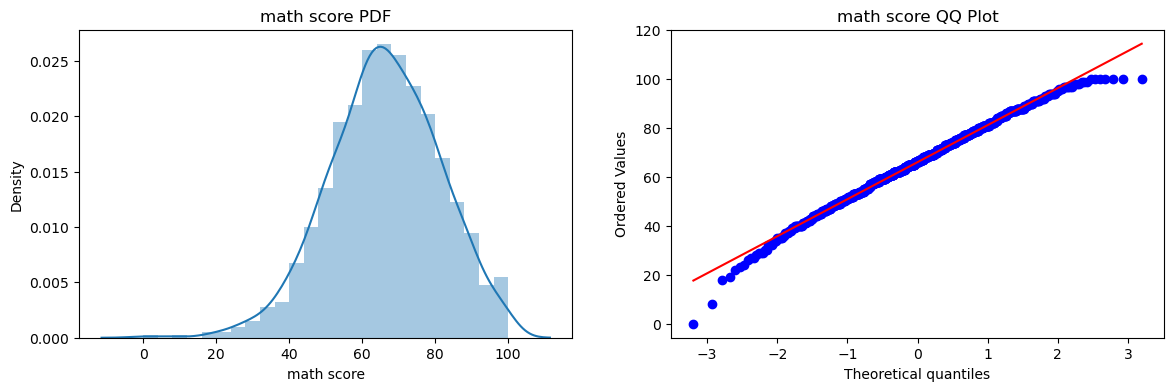

In [42]:
plot_qq_plot('math score')

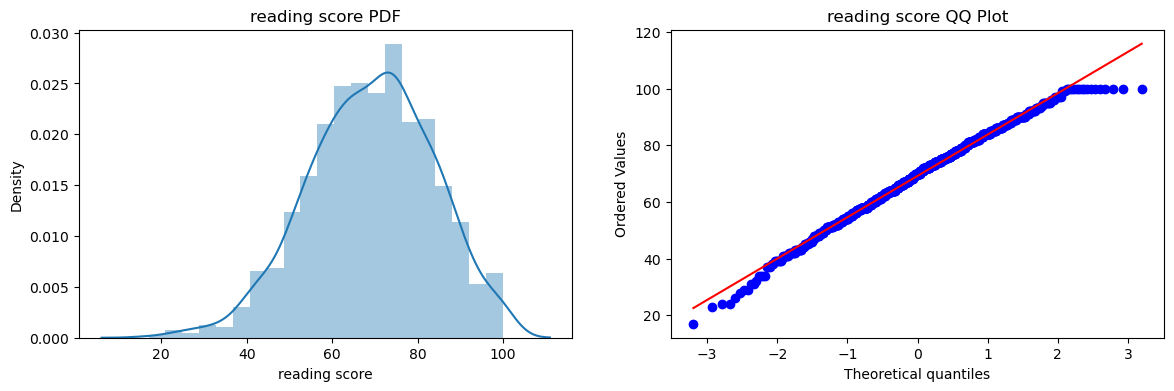

In [31]:
plot_qq_plot('reading score')

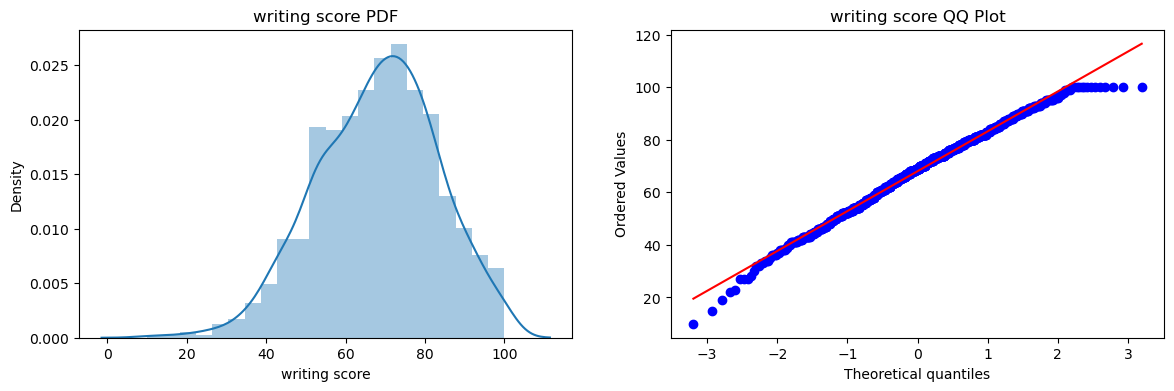

In [45]:
plot_qq_plot('writing score')

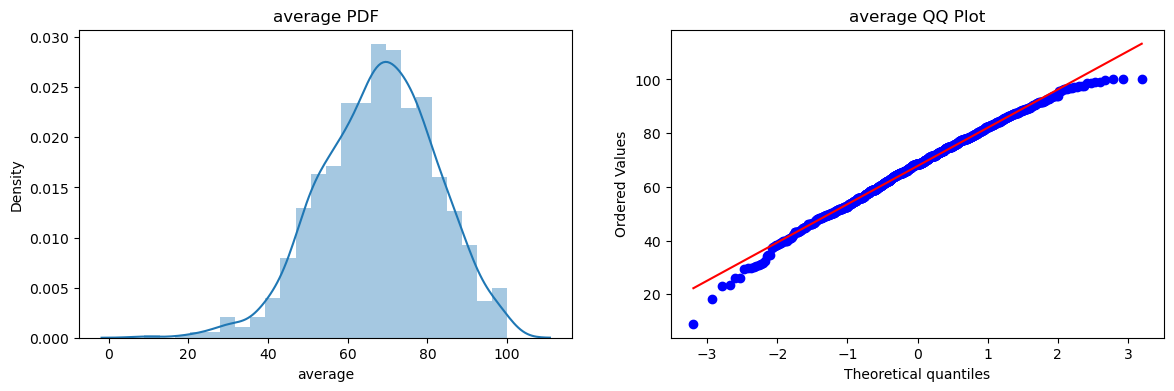

In [33]:
plot_qq_plot('average')

#### Insights
-  For range -2 to 2 avg_score & math score follows normal distribution, but for values less than -2 and for values greater than 2 it doesn't follow normal distribution

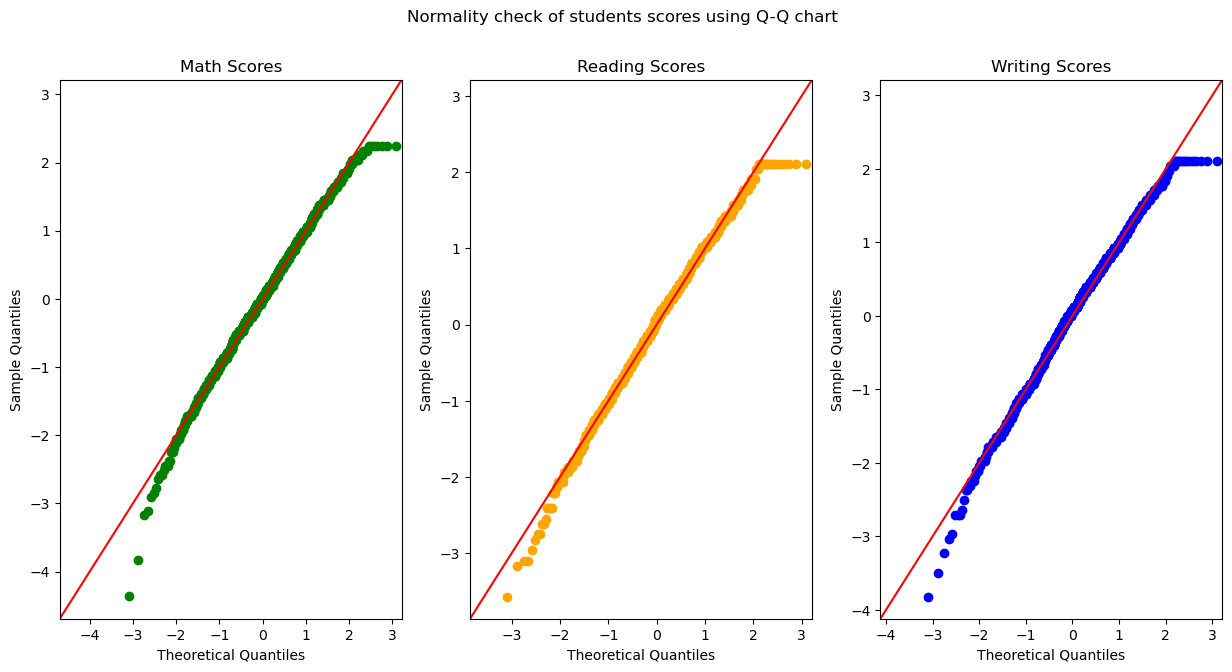

In [34]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 7)) 


sm.qqplot(df['math score'], markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True, ax=ax1)
ax1.set_title("Math Scores")

sm.qqplot(df['reading score'], markerfacecolor = "orange", markeredgecolor = "orange", line='45', fit = True, ax=ax2)
ax2.set_title("Reading Scores")

sm.qqplot(df['writing score'], markerfacecolor = "blue", markeredgecolor = "blue", line='45', fit = True, ax=ax3)
ax3.set_title("Writing Scores")

# Set the global title
plt.suptitle("Normality check of students scores using Q-Q chart")

plt.show()

 #### Insights
  - There exists correlation between students scores and the normal distribution line. This means that our data is very close to Gaussian! 